In [331]:
import pandas as pd


import numpy as np


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")



from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [303]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [304]:
df.shape

(158, 12)

In [193]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [194]:
print(df['Happiness Score'].min())
print(df['Happiness Score'].max())


2.839
7.587


In [195]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [196]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [197]:
df['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [198]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [200]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [201]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [202]:
print(df.duplicated().sum())

0


In [203]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Happiness Score', ylabel='Country'>

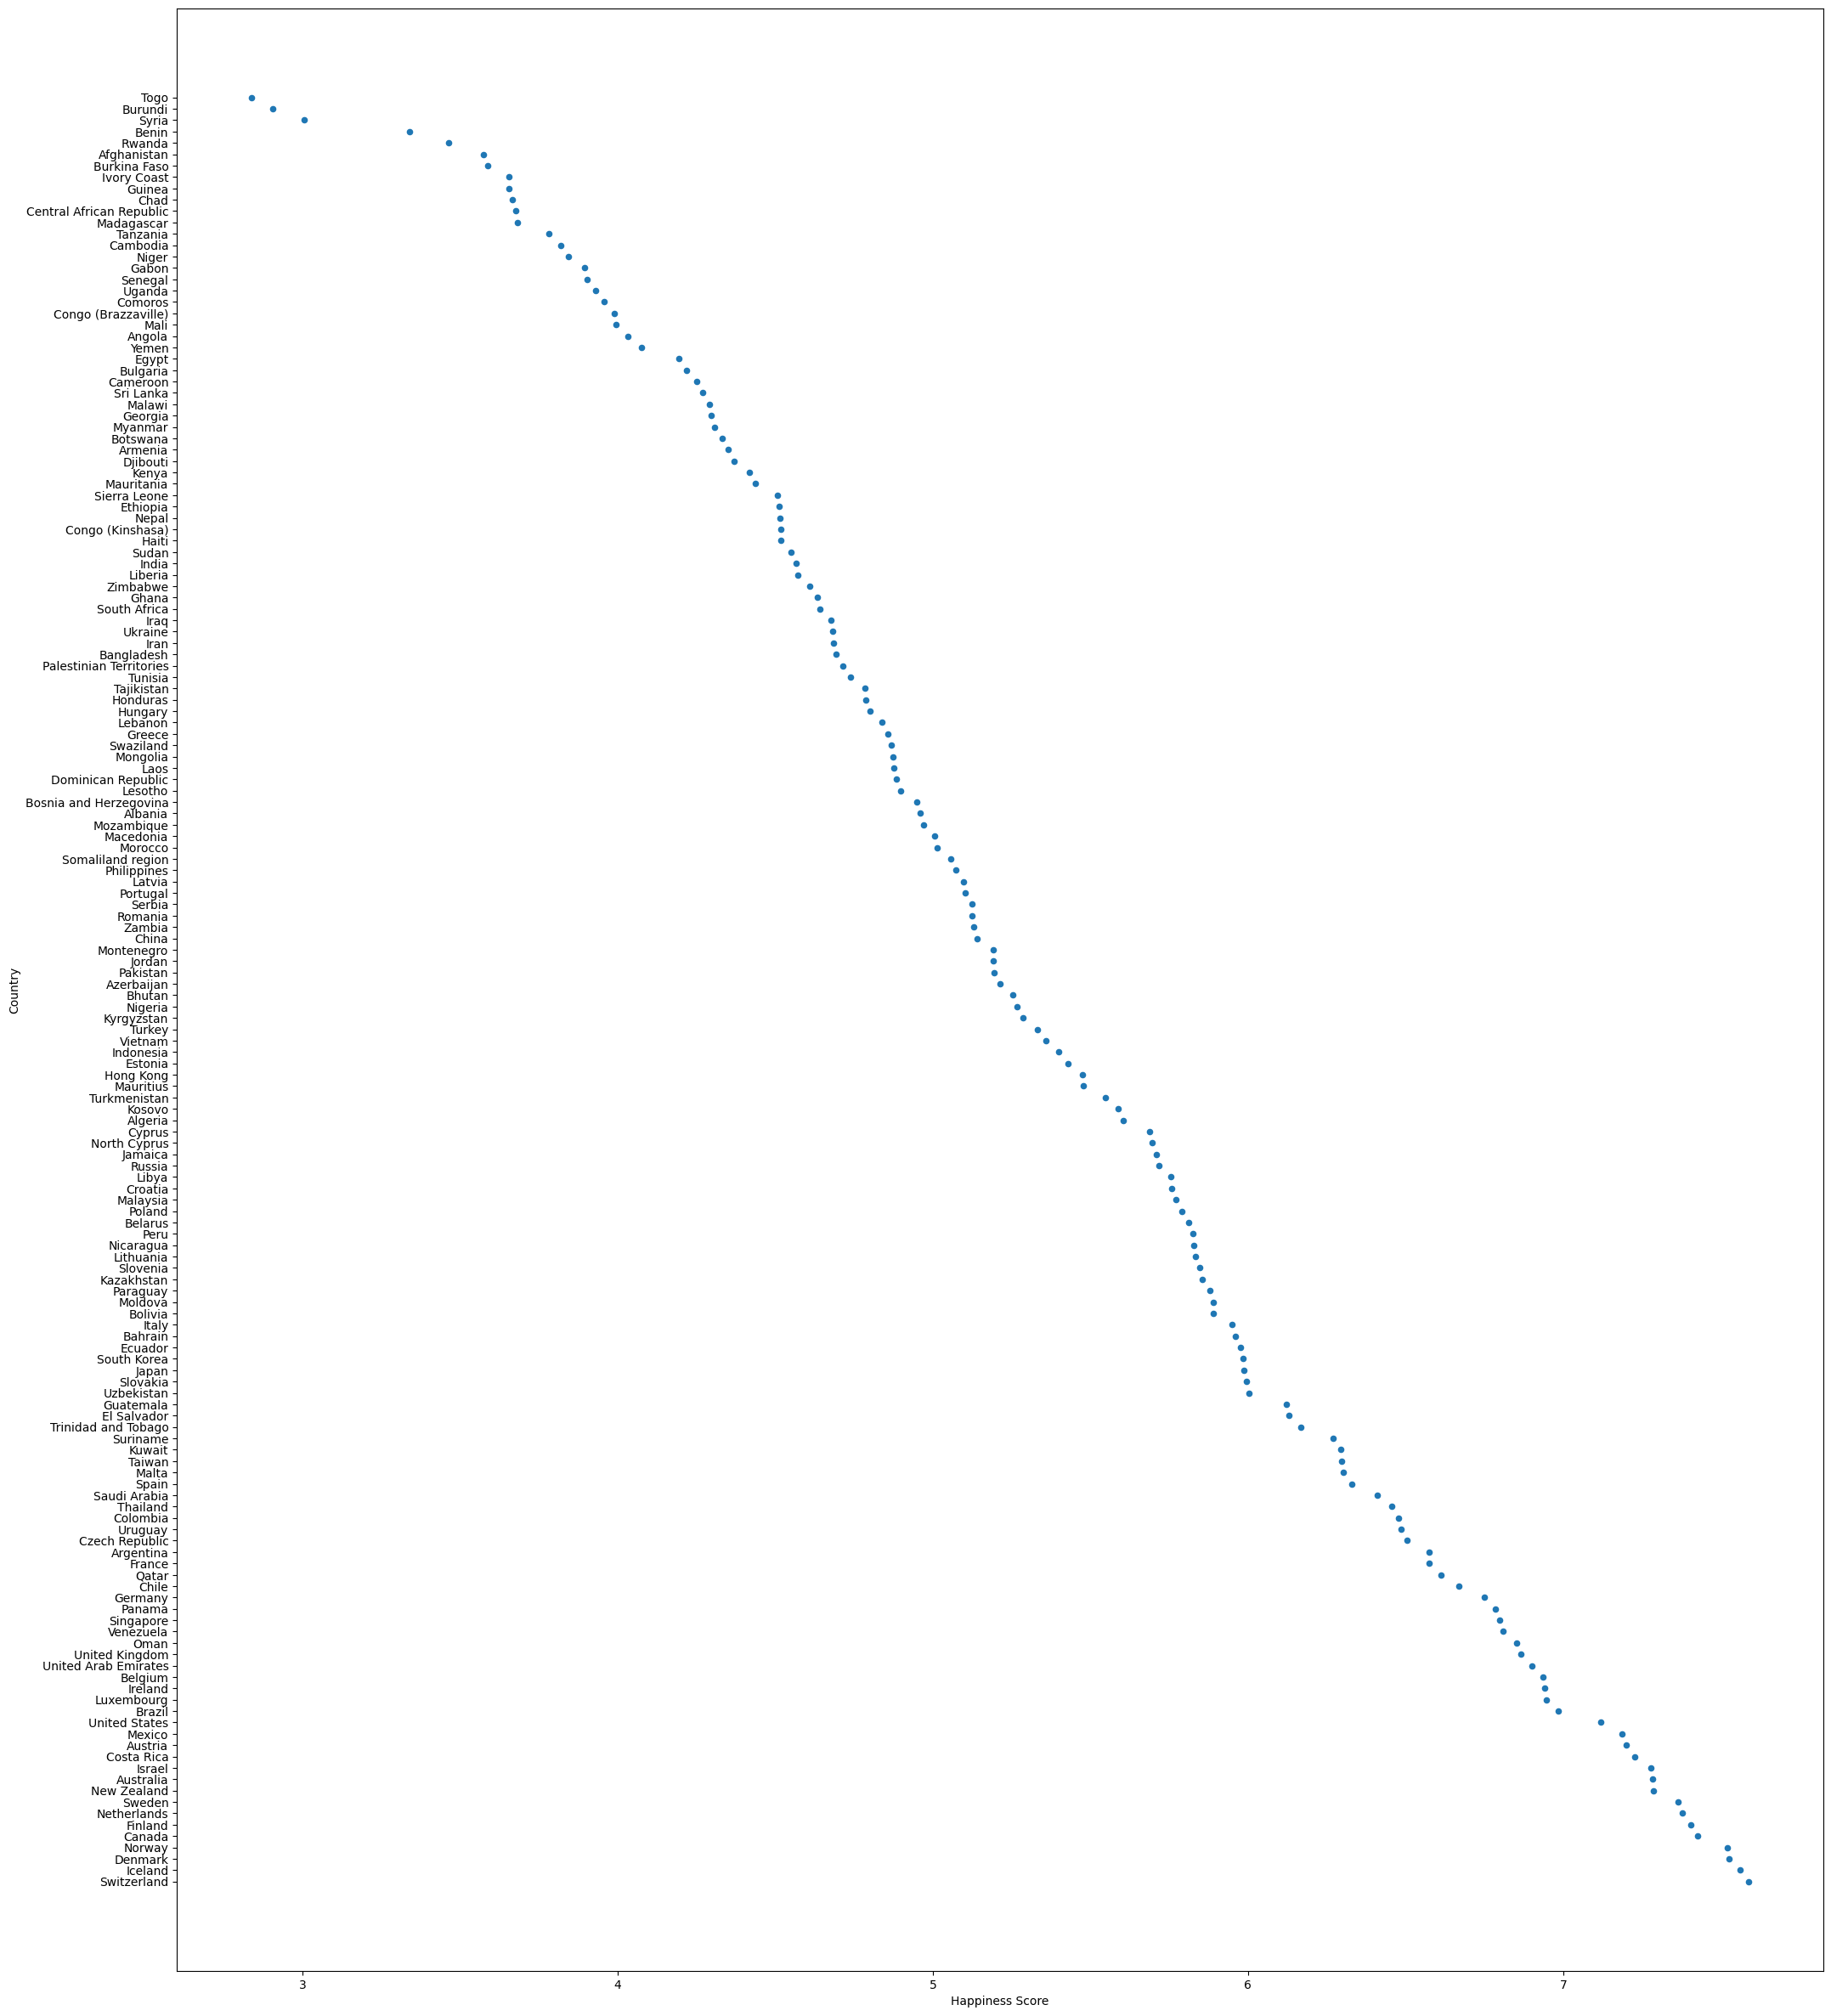

In [205]:
df.plot(kind='scatter',x='Happiness Score',y='Country',figsize=(25,30))

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

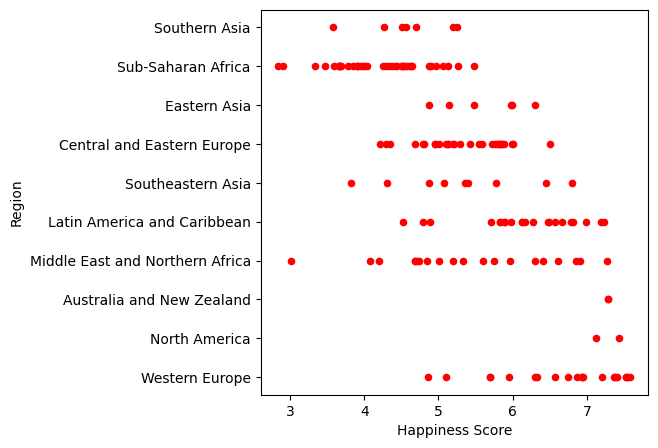

In [206]:
df.plot(kind='scatter',x='Happiness Score',y='Region',figsize=(5,5),color='Red')

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

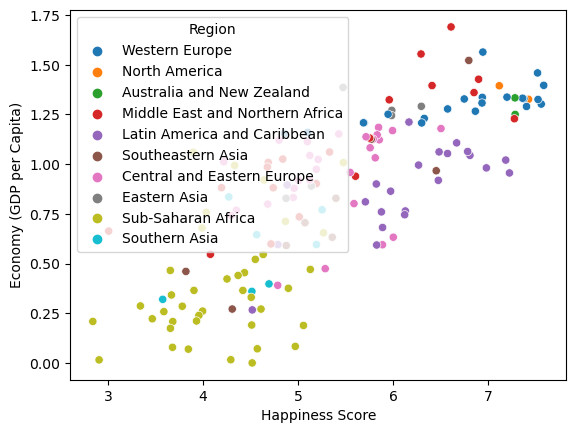

In [207]:
sns.scatterplot(data=df, x="Happiness Score", y="Economy (GDP per Capita)", hue="Region")

<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>

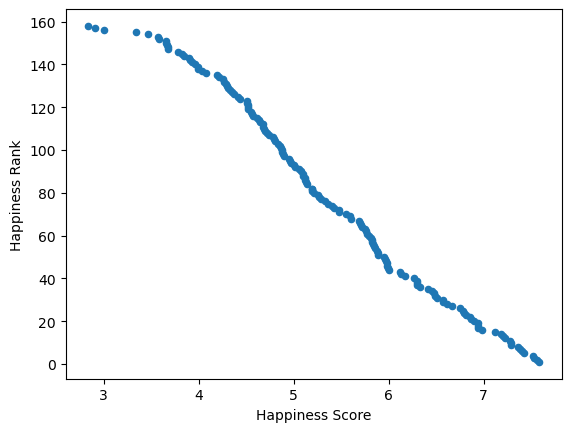

In [306]:
df.plot(kind='scatter',x='Happiness Score',y='Happiness Rank')

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

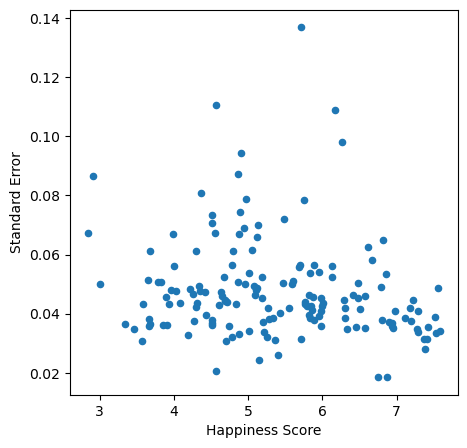

In [209]:
df.plot(kind='scatter',x='Happiness Score',y='Standard Error',figsize=(5,5))

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

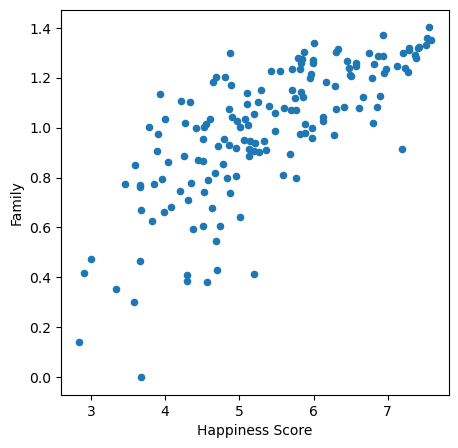

In [210]:
df.plot(kind='scatter',x='Happiness Score',y='Family',figsize=(5,5))

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

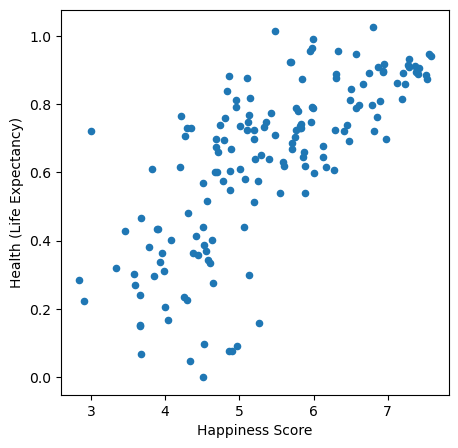

In [211]:
df.plot(kind='scatter',x='Happiness Score',y='Health (Life Expectancy)',figsize=(5,5))

<AxesSubplot:xlabel='Happiness Score', ylabel='Freedom'>

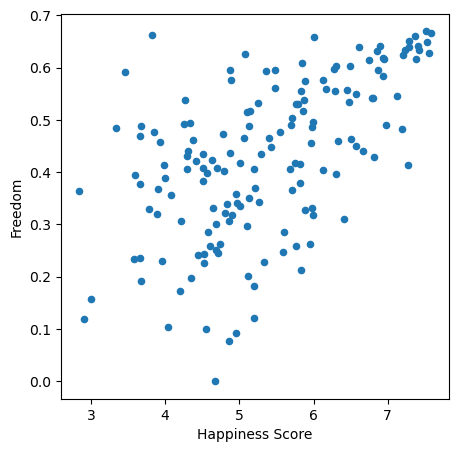

In [212]:
df.plot(kind='scatter',x='Happiness Score',y='Freedom',figsize=(5,5))

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

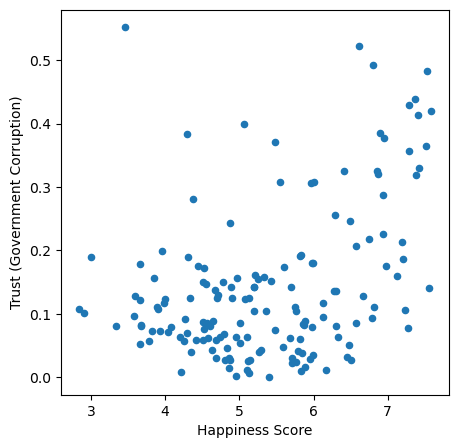

In [213]:
df.plot(kind='scatter',x='Happiness Score',y='Trust (Government Corruption)',figsize=(5,5))

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

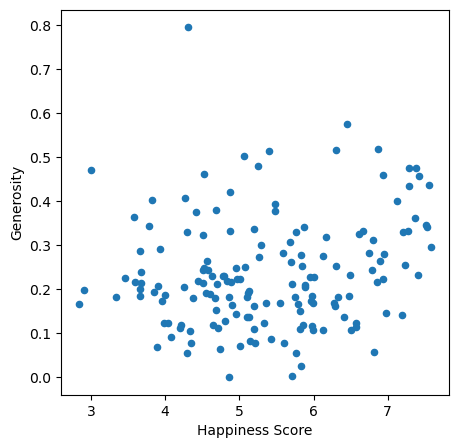

In [214]:
df.plot(kind='scatter',x='Happiness Score',y='Generosity',figsize=(5,5))

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

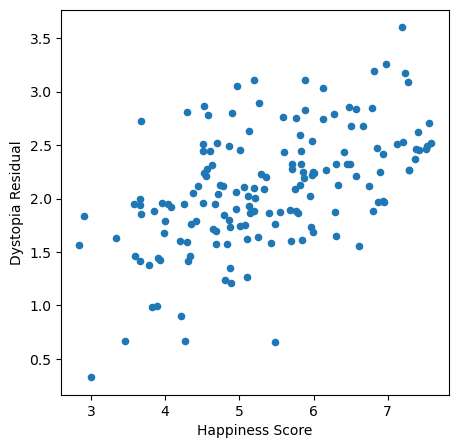

In [215]:
df.plot(kind='scatter',x='Happiness Score',y='Dystopia Residual',figsize=(5,5))

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

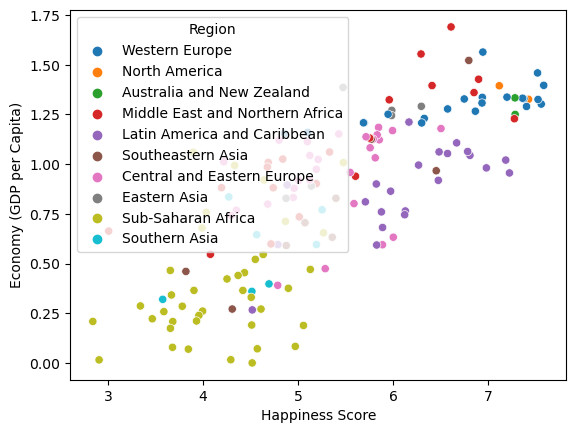

In [216]:
sns.scatterplot(data=df, x="Happiness Score", y="Economy (GDP per Capita)", hue="Region")

In [402]:
df.drop(columns=['Country','Region'],axis=1)
df

KeyError: "['Country', 'Region'] not found in axis"

In [403]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [219]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


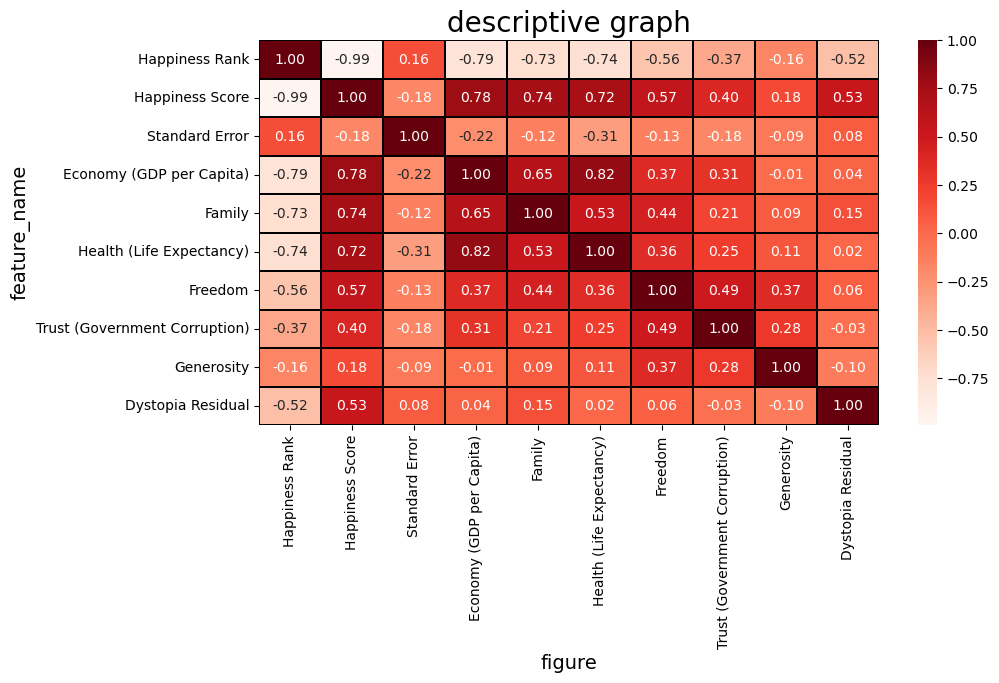

In [220]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Reds')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_name',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.show()

In [221]:
df.groupby('Region')['Economy (GDP per Capita)'].mean()

Region
Australia and New Zealand          1.291880
Central and Eastern Europe         0.942438
Eastern Asia                       1.151780
Latin America and Caribbean        0.876815
Middle East and Northern Africa    1.066974
North America                      1.360400
Southeastern Asia                  0.789054
Southern Asia                      0.560486
Sub-Saharan Africa                 0.380473
Western Europe                     1.298596
Name: Economy (GDP per Capita), dtype: float64

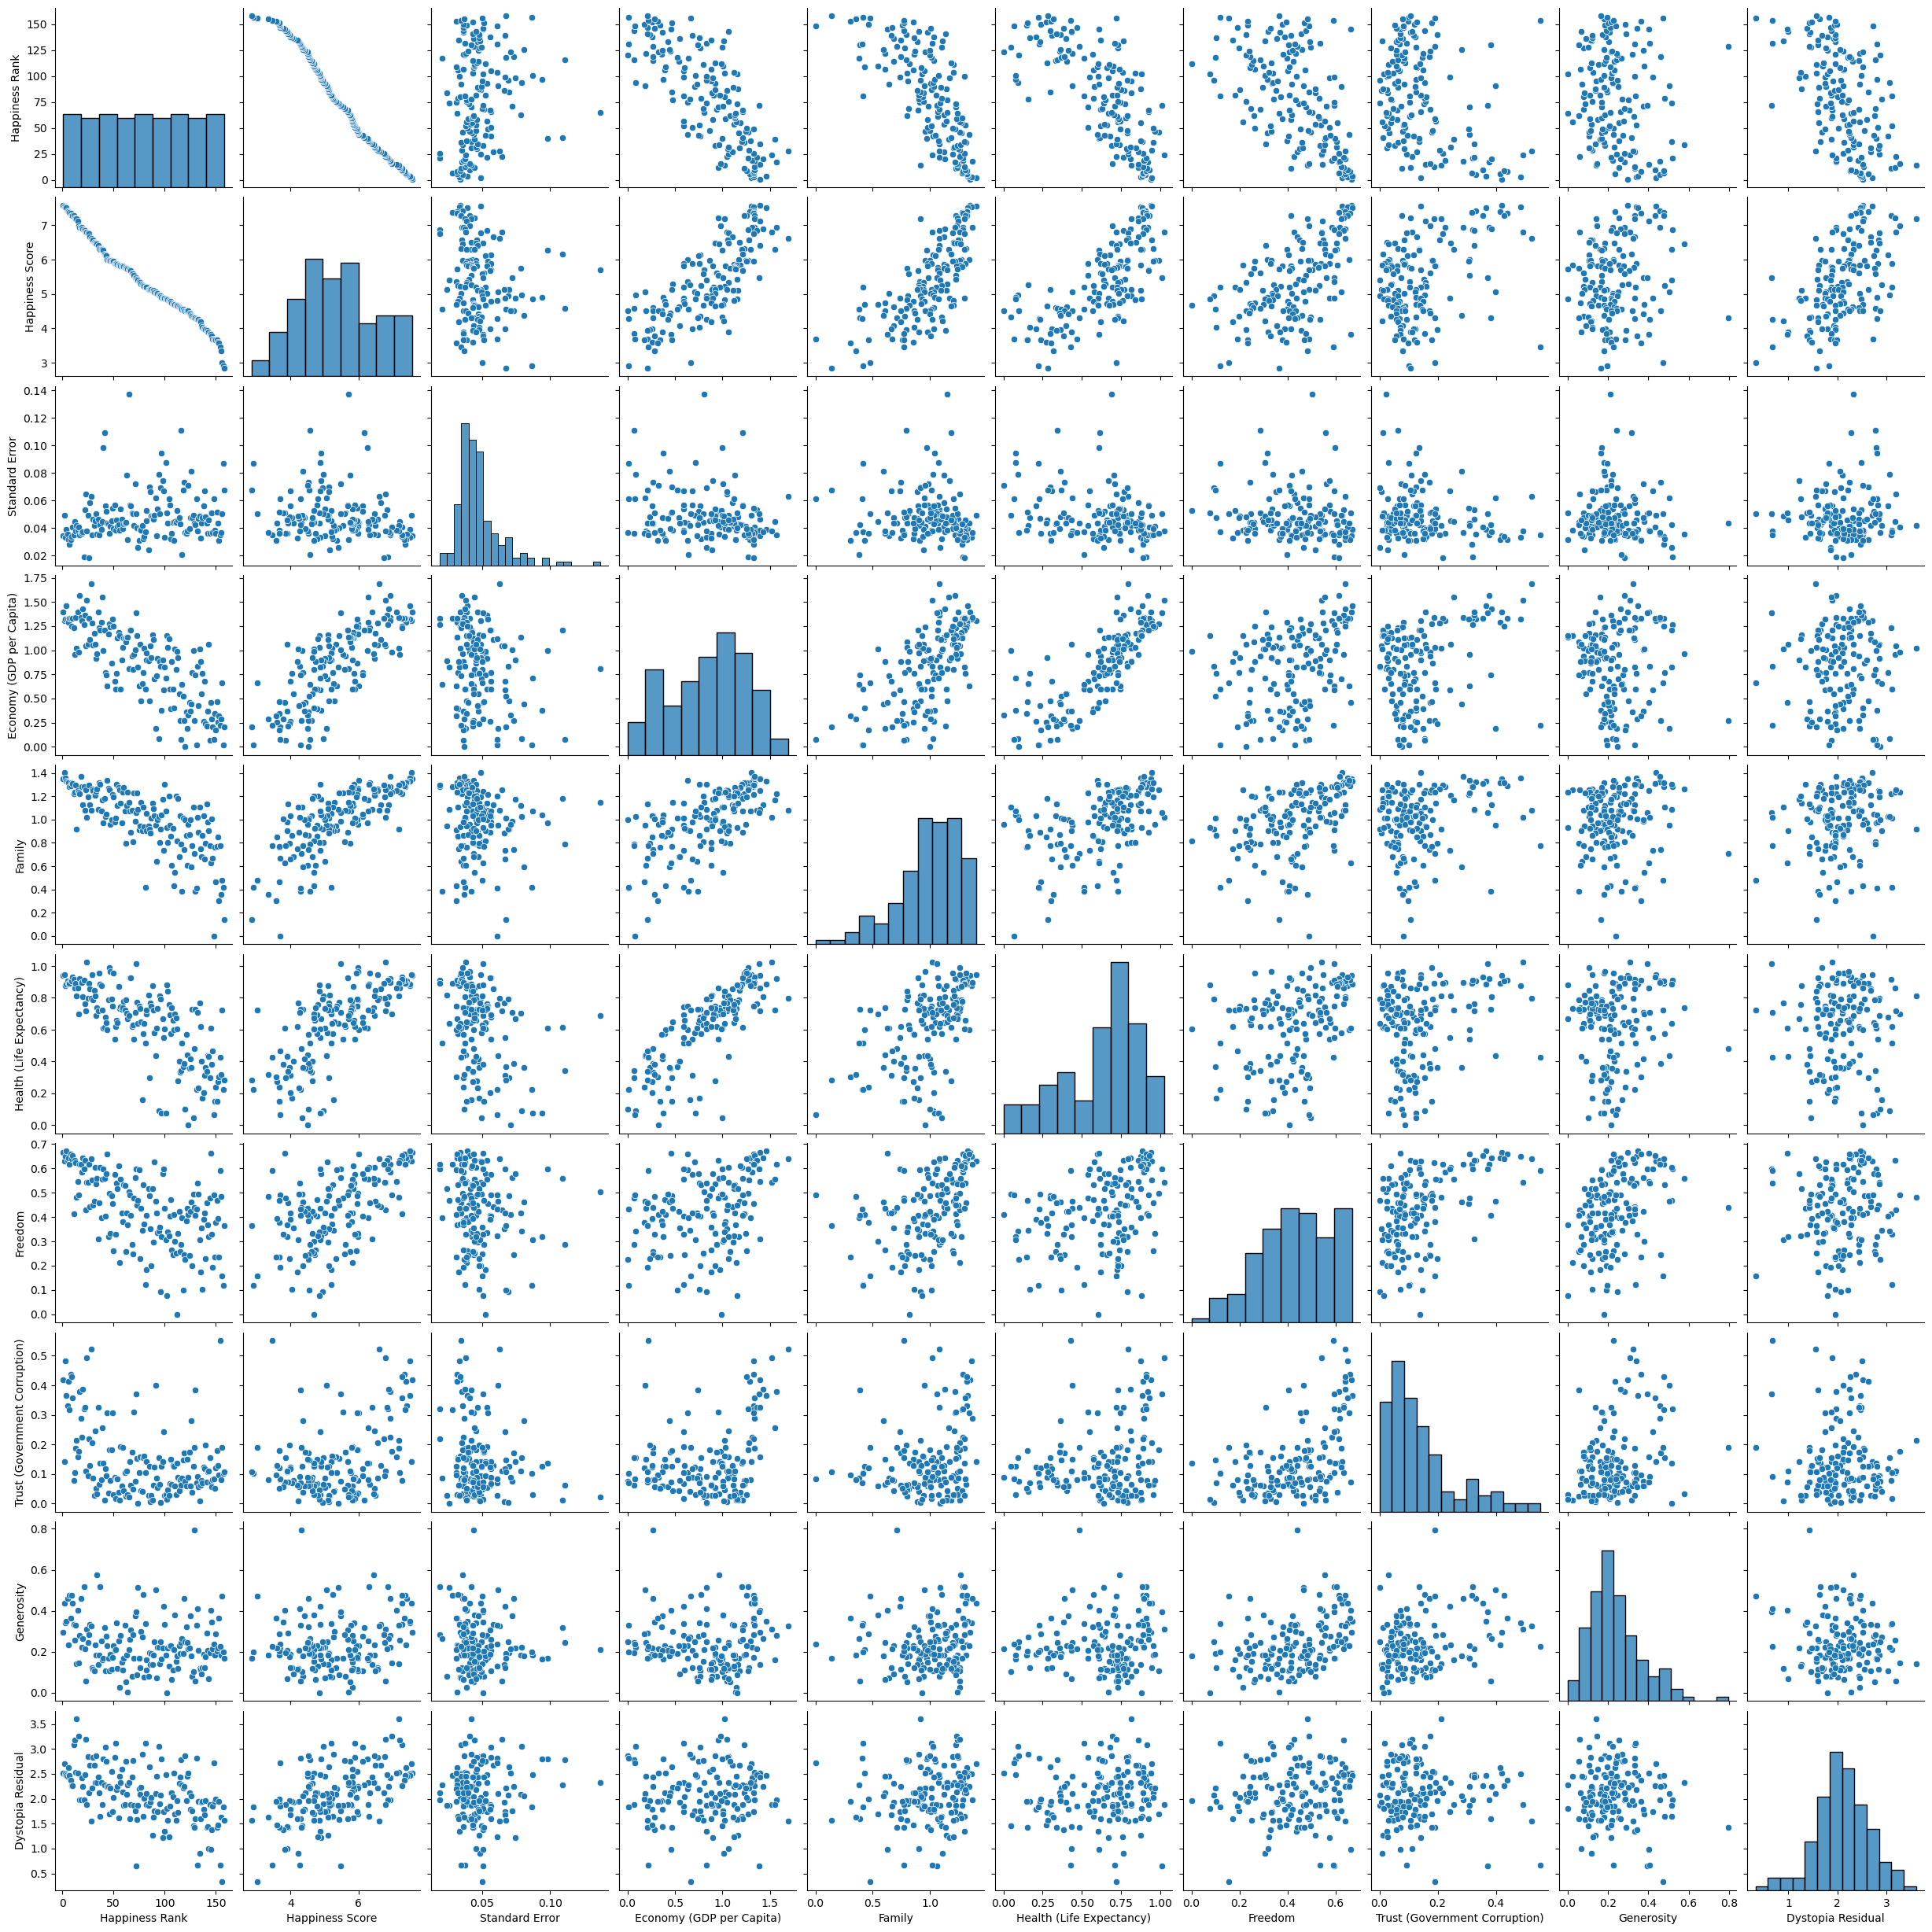

In [311]:
sns.pairplot(data=df,palette="Dark2")

Happiness Rank                      AxesSubplot(0.125,0.712609;0.227941x0.167391)
Happiness Score                  AxesSubplot(0.398529,0.712609;0.227941x0.167391)
Standard Error                   AxesSubplot(0.672059,0.712609;0.227941x0.167391)
Economy (GDP per Capita)            AxesSubplot(0.125,0.511739;0.227941x0.167391)
Family                           AxesSubplot(0.398529,0.511739;0.227941x0.167391)
Health (Life Expectancy)         AxesSubplot(0.672059,0.511739;0.227941x0.167391)
Freedom                              AxesSubplot(0.125,0.31087;0.227941x0.167391)
Trust (Government Corruption)     AxesSubplot(0.398529,0.31087;0.227941x0.167391)
Generosity                        AxesSubplot(0.672059,0.31087;0.227941x0.167391)
Dystopia Residual                       AxesSubplot(0.125,0.11;0.227941x0.167391)
dtype: object

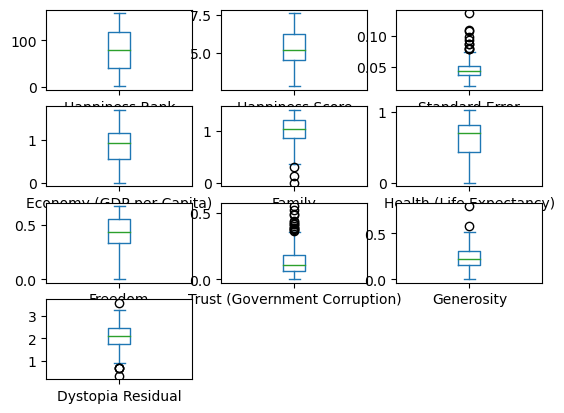

In [312]:
df.plot(kind='box',subplots=True,layout=(4,3))

In [316]:
from scipy.stats import zscore
out_features=df[['Standard Error','Family','Trust (Government Corruption)','Dystopia Residual']]
z=np.abs(zscore(out_features))
z

,Standard Error,Family,Trust (Government Corruption),Dystopia Residual
0,0.805926,1.320281,2.309652,0.758258
1,0.055889,1.514458,0.016480,1.092857
2,0.854487,1.361054,2.842774,0.712335
3,0.531526,1.251922,1.852081,0.663893
4,0.722845,1.221204,1.555725,0.639337
...,...,...,...,...
153,0.774917,0.800520,3.413922,2.588925
154,0.662582,2.346860,0.529210,0.843967
155,0.132534,1.901086,0.381419,3.208430
156,2.263962,2.118467,0.357715,0.481985


In [317]:
#threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 147, 153, 155, 157]),
 array([2, 0, 0, 0, 1, 2, 3, 1]))

In [318]:
#removing the data above zscore and creating the newdf
df1=df[(z<3).all(axis=1)]


df1.shape

(150, 12)

In [319]:
print('old data shape',df.shape[0])
print("new data shape",df1.shape[0])

old data shape 158
new data shape 150


In [325]:
#separatinh feature and label
x=df1.drop('Happiness Score',axis=1)
y=df1['Happiness Score']

In [326]:
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,Ivory Coast,Sub-Saharan Africa,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [327]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 150, dtype: float64

In [413]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)
    

In [414]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_score:",r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('mean squared error:',mean_squared_error(y_test,pred_LR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_score: 0.325452517933298
R2_score on training data: 41.14075775997431
mean absolute error: 0.3073824043400979
mean squared error: 0.16631581749405283
root mean squared error: 0.40781836336051963


In [415]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_score:",r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('mean squared error:',mean_squared_error(y_test,pred_RFR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor()
R2_score: 0.3782893788365228
R2_score on training data: 88.81686184283495
mean absolute error: 0.24756983853952308
mean squared error: 0.15328840882592526
root mean squared error: 0.39152063652625674


In [416]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print("R2_score:",r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('mean squared error:',mean_squared_error(y_test,pred_knn))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.04654177215189892
R2_score on training data: 43.00961155758042
mean absolute error: 0.35977653631284917
mean squared error: 0.23508379888268155
root mean squared error: 0.4848544099858034


In [417]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_score:",r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('mean squared error:',mean_squared_error(y_test,pred_GBR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.38989688615633467
R2_score on training data: 65.72506683632267
mean absolute error: 0.2721701168499737
mean squared error: 0.1504264723125045
root mean squared error: 0.38784851722354763


In [418]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_score:",r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('mean squared error:',mean_squared_error(y_test,pred_lasso))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

Lasso()
R2_score: 0.027460530601732147
R2_score on training data: 7.015691463524076
mean absolute error: 0.46304347341567575
mean squared error: 0.23978845255286407
root mean squared error: 0.48968199124826317


In [419]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print(rd)
print("R2_score:",r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('mean squared error:',mean_squared_error(y_test,pred_rd))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

Ridge()
R2_score: 0.3255567126540764
R2_score on training data: 41.13968899963688
mean absolute error: 0.3079738010656376
mean squared error: 0.16629012733787327
root mean squared error: 0.40778686508747836


In [420]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_score:",r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('mean squared error:',mean_squared_error(y_test,pred_dtr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.15415910617411543
R2_score on training data: 96.22728520981504
mean absolute error: 0.21252992817238628
mean squared error: 0.20854976627522517
root mean squared error: 0.4566724934515163


In [422]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_score:",r2_score(y_test,pred_svr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('mean squared error:',mean_squared_error(y_test,pred_svr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svr)))


SVR()
R2_score: -0.06454587568299153
R2_score on training data: 6.546780566582012
mean absolute error: 0.3807513558464503
mean squared error: 0.26247346892717566
root mean squared error: 0.5123216459678194
<function accuracy_score at 0x13a3243a0>


ValueError: Classification metrics can't handle a mix of binary and continuous targets

# QUESTION2

In [335]:
data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [336]:
data.shape

(891, 12)

In [337]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [338]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

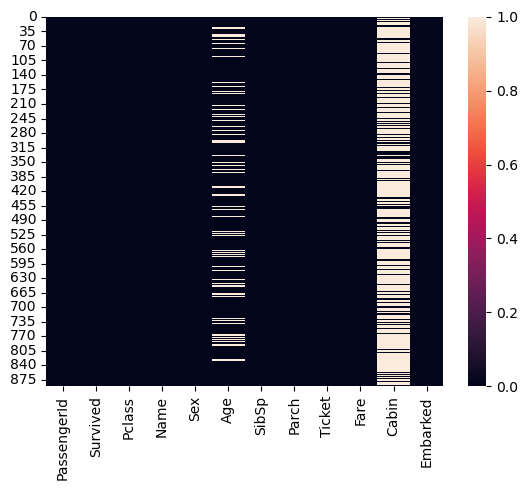

In [339]:
sns.heatmap(data.isnull())

In [340]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Cabin']=data["Cabin"].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [341]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [343]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [344]:
#converting the data 


<AxesSubplot:>

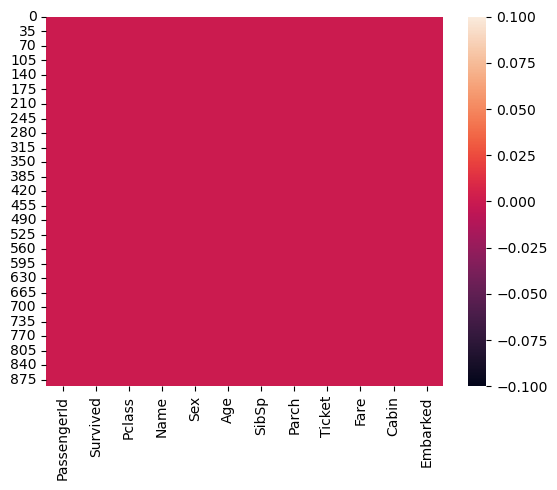

In [345]:
sns.heatmap(data.isnull())

In [346]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [347]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

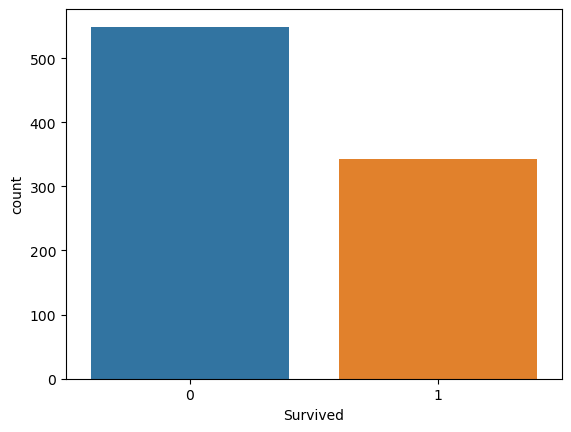

In [348]:
sns.countplot(data['Survived'])
plt.show()

In [349]:
#data looks imbalanced

In [350]:
#checking the value counts of each column
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000     

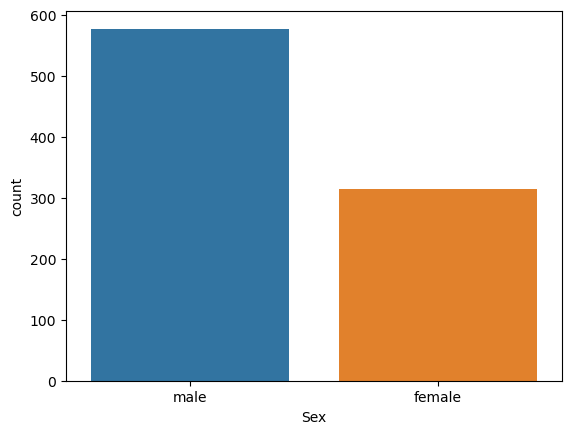

In [351]:
sns.countplot(data['Sex'])
plt.show()

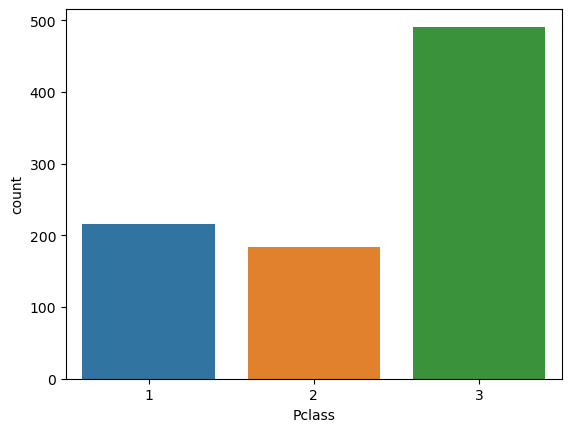

In [352]:
sns.countplot(data['Pclass'])
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

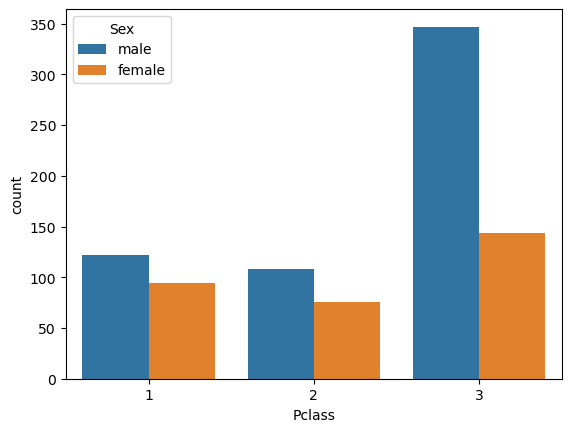

In [353]:
sns.countplot('Pclass',hue='Sex',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

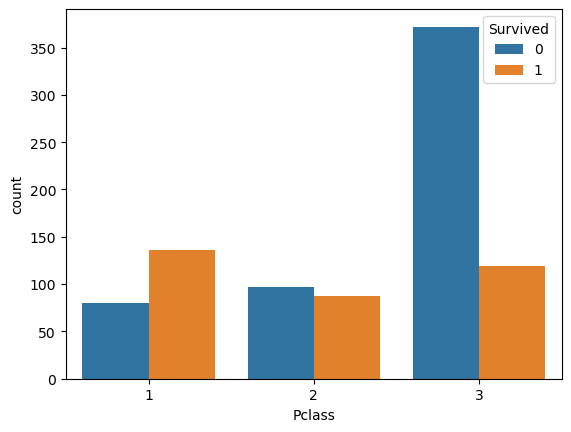

In [354]:
sns.countplot('Pclass',hue='Survived',data=data)

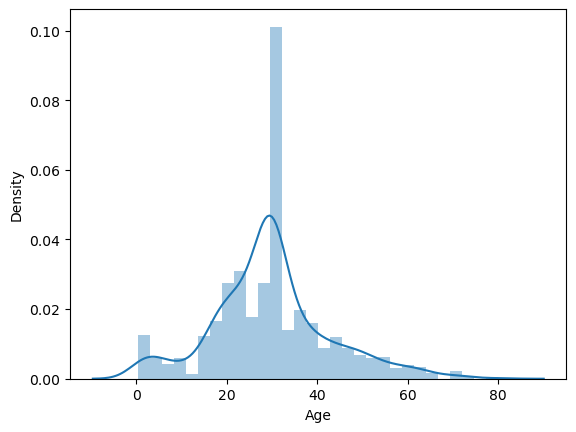

In [389]:
sns.distplot(data['Age'])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

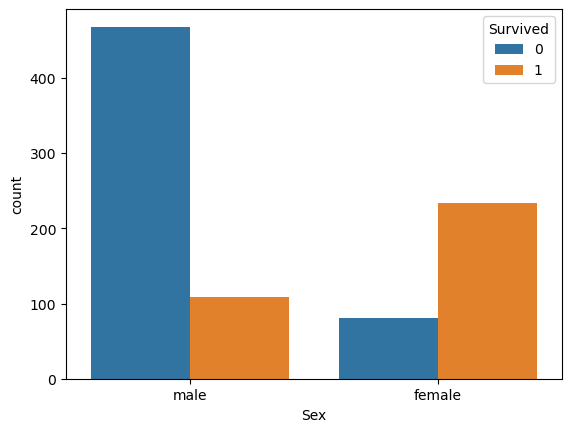

In [357]:
sns.countplot('Sex',hue='Survived',data=data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

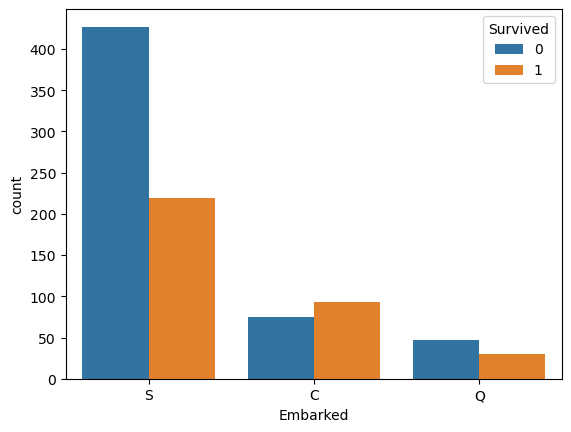

In [358]:
sns.countplot('Embarked',hue='Survived',data=data)

In [359]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

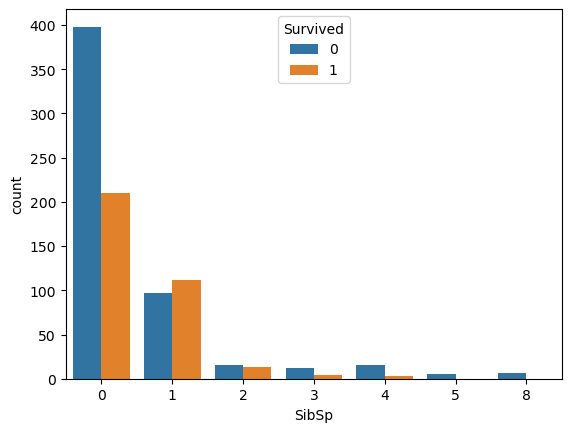

In [392]:
sns.countplot('SibSp',hue='Survived',data=data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

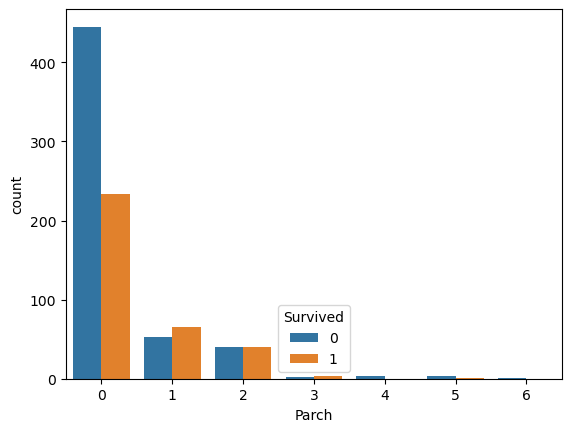

In [361]:
sns.countplot('Parch',hue='Survived',data=data)

In [362]:
#converting the categorical data to numerical

data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,B96 B98,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,B96 B98,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,1


In [363]:
#separating x and y data

x=data.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)
y=data['Survived']


In [364]:
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [365]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [366]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(712, 7) (179, 7)
(712,) (179,)


In [367]:
lr=LogisticRegression()


In [368]:
#predicting the data on x_test 
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print(accuracy_score(y_test,pred))


#predicting the data on x_train
lr.fit(x_train,y_train)
pred=lr.predict(x_train)
print(accuracy_score(y_train,pred))


0.7821229050279329
0.8075842696629213


In [ ]:
logistic regressor giving good result both on test and trained data

In [384]:
import pickle
pickle.dump(lr,open('survivalrate','wb'))

In [386]:
loaded_model=pickle.load(open("survivalrate",'rb'))


